# Exercise 3: **Logistic Regression**


### Basics of Biomedical Data Analysis

**Stephane Deny**: stephane.deny@aalto.fi

**Carlos Sevilla Salcedo**: carlos.sevillasalcedo@aalto.fi

**Hyunkyung Choo**: hyunkyung.choo@aalto.fi

<br></br>
<center><img src = imgs/pic1.png width="40%">
</center>

In this exercise, we will attempt to decode the reach direction of a monkey from its recorded neural activity in the premotor and motor cortices. This will allow us to gain insights into the function of each of these regions, and how they are involved in the production of movements.

# 1. Dataset description

The data was collected from a set of experiments for which a **monkey** was instructed to move a **manipulandum**, which is an exoskeleton that fits over the arm and constrains movement to a 2D plane.
Think of the manipulandum as a joystick controlled by the whole arm.
<br></br>
<center>
    <img src=imgs/pic2.png width="25%"><br></br>
<em>Figure 1.</em> Diagram of a manipulandum
</center>
   
The behavioural task was the center-out paradigm pioneered by Georgopoulos
and colleagues (1982). The monkey fist **holds the cursor over the center target for 500 ms**. Then, a peripheral target appears at one of **eight locations arranged in a circle** around the center target.
<br></br>
<center>
    <img src=imgs/pic3.png width="25%"><br></br>
    <em>Figure 2.</em> A monkey operating a manipulandum.
</center>


In our task, there is an **instructed delay**, which means that after the peripheral target appears, the monkey must **wait approximately 1-2 s for a go cue**. After the go cue, the monkey moves its hand to the peripheral target and **holds for 500 ms**, and the trial is completed.
<br></br>
<center>
    <img src=imgs/pic4.png width="25%"><br></br>
    <em>Figure 3.</em> Hand trajectories for a center-out reach task.
</center>

The population of neurons that you will analyse was recorded from **motor (M1) and pre-motor (PMd) brain areas** of a monkey performing this center-out reaching task. These data are adapted from an assignment for Nicho Hatsopoulos Computational Neuroscience course at University of Chicago.

<br></br>
<center>
    <img src=imgs/pic5.png width="25%"><br></br>
    <em>Figure 4.</em> The dorsal premotor cortex (PMd) is involved in selecting motor programs to prepare motor actions. The primary motor cortex (M1) is involved in executing these motor programs (source: https://www.jneurosci.org/content/26/24/6397).
</center>

# 1.1. Data loading

The data with the neural activity you will use is stored in `HatsopoulosReachTask.mat`. The next code cell loads this file with the following variables:
- `numNeurons`, `numTimebins`, `numTrials`
- `firingRate` (`numNeurons x numTimebins x numTrials`): firing rate of each neuron, in each time bin, on each trial.
- `dt`: length of each time bin in seconds.
- `cueTime`, `goTime`: time of the instruction cue and the go signal in seconds.
- `direction` (`1 x numTrials`): the direction of the reach (takes values from 1-8, starting from 0º, then 45º, on to 315º).
- `brainRegion` (`1 x numNeurons`): either *'MI'* (motor area) or *'PMd'* (pre-motor area).

In [1]:
### Load required python libraries

import numpy as np
import matplotlib.pyplot as plt
import scipy.io
#import ipympl
%matplotlib inline

#We first load the .mat file
data = scipy.io.loadmat('HatsopoulosReachTask.mat')
#Then, we store the features in dictionary `data` in their corresponding variables
direction = np.squeeze(np.array(data['direction']))
firingRate = np.squeeze(np.array(data['firingRate']))
brainRegion = np.squeeze(data['brainRegion'])
goTime = np.squeeze(data['goTime'])
cueTime = float(np.squeeze(data['cueTime']))
dt = float(np.squeeze(data['dt']))
numNeurons = int(data['numNeurons'])
numTimebins = int(data['numTimebins'])
numTrials = int(data['numTrials'])

# 2. Data visualisation

We start by visualising the `firingRate` trajectories, averaged over neurons, for both brain regions PMd and MI.



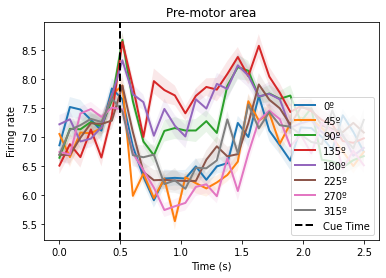

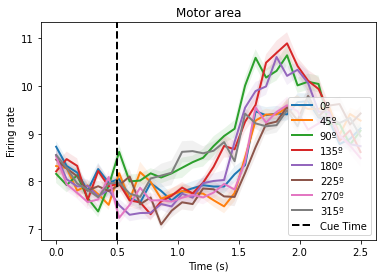

In [2]:
#Define the problem space
t = np.linspace(0,2.5,30)
angle_str = [str(a) + 'º' for a in np.arange(0,360,45)]

####################### PMd #######################
#Store the values that correspond to the 'PMd' brainRegion
PMd = firingRate[brainRegion == 'PMd',:,:]
#Define a matrix to store the mean value in each direction
PMd_mean = np.zeros((8,PMd.shape[1]))

#Plot the mean value and confidence interval of neuron activities for each direction
fig, ax = plt.subplots()
for i in range(1,9):
    #Plot the mean value
    PMd_mean[i-1,:] = np.mean(np.mean(PMd[:,:,direction==i],axis=2),axis=0)
    ax.plot(t, PMd_mean[i-1,:], linewidth = 2, label=angle_str[i-1])
    #Plot the confidence interval
    ConfidenceInterval = 2 * np.std(np.mean(PMd[:,:,direction==i],axis=0),axis=1)/np.sqrt(PMd.shape[2])
    ax.fill_between(t, (PMd_mean[i-1,:]-ConfidenceInterval), (PMd_mean[i-1,:]+ConfidenceInterval), alpha=.1)
ax.axvline(x=cueTime, c = 'k', linestyle = '--', label = 'Cue Time', linewidth = 2)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Firing rate')
plt.legend(loc = 'lower right')
plt.title('Pre-motor area')
plt.show()

####################### M1 ########################
#Make an equivalent plot for M1

#Store the values that correspond to the 'PMd' brainRegion
M1 = firingRate[brainRegion == 'MI',:,:]
#Define a matrix to store the mean value in each direction
M1_mean = np.zeros((8,M1.shape[1]))

#Plot the mean value and confidence interval of neuron activities for each direction
fig, ax = plt.subplots()
for i in range(1,9):
    #Plot the mean value
    M1_mean[i-1,:] = np.mean(np.mean(M1[:,:,direction==i],axis=2),axis=0)
    ax.plot(t, M1_mean[i-1,:], linewidth = 2, label=angle_str[i-1])
    #Plot the confidence interval
    ConfidenceInterval = 2 * np.std(np.mean(M1[:,:,direction==i],axis=0),axis=1)/np.sqrt(M1.shape[2])
    ax.fill_between(t, (M1_mean[i-1,:]-ConfidenceInterval), (M1_mean[i-1,:]+ConfidenceInterval), alpha=.1)
ax.axvline(x=cueTime, c = 'k', linestyle = '--', label = 'Cue Time', linewidth = 2)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Firing rate')
plt.legend(loc = 'lower right')
plt.title('Motor area')
plt.show()

# 3. Decoding the reach direction from neural activity 

We will now attempt to decode the reach direction of the monkey from the recorded neural activity averaged over the entire trial. 

## 3.1. Decoding the reach direction from the brain activity averaged over time

**Question 1: Preparing the data for the logistic regression** 

a) Construct the following matrices: 
* `X`: neural activity for all neurons and all trials, **averaged over time** (size `numTrials x numNeurons`)
* `y`: **reach direction for each trial**, indicated by a number between 1 and 8 (size `numTrials`)

b) Randomly permute the trials of `X` and `y`, using the same random permutation order for `X` and `y`. This will get rid of the temporal order of the trials, which is an important step before dividing the dataset into a training set and a validation set.

c) Z-score the data matrix `X`, such that the mean neural activity across trials is 0 and the standard deviation 1. 

d) Divide each of these matrices into a training set and a validation set of equal size (i.e. equal number of trials in the training set and the validation set). Name these matrices `X_train`, `X_val`, `y_train`, `y_val`.

e) Print the shape of each of these matrices and check that these shapes are as expected.

In [3]:
#Constructing the matrices
X = np.mean(firingRate, axis = 1)
y = direction

#Permuting
permutation = np.random.permutation(numTrials)
X_permute = X[:,permutation]
y_permute = y[permutation]

#Z-scoring
my = np.mean(X_permute, axis = 0)
sigma = np.std(X_permute, axis = 0)
zscore_X = (X_permute - my) / sigma

#Training set and validation set
X_train = zscore_X[:,:int(numTrials/2)].T
X_val = zscore_X[:,int(numTrials/2):].T

y_train = y_permute[:int(numTrials/2)]
y_val = y_permute[int(numTrials/2):]

#Printing
print('X_train', X_train.shape, 'X_val', X_val.shape,'y_train', y_train.shape,'y_val', y_val.shape)

X_train (79, 143) X_val (79, 143) y_train (79,) y_val (79,)


In [ ]:
#FIND SOME HELP HERE

permutation = np.random.permutation(numTrials)

print('X_train', X_train.shape, 'X_val', X_val.shape,'y_train', y_train.shape,'y_val', y_val.shape)

**Question 2: Training a decoder that predicts reach direction from neural activity** 

a) Train a decoder that predicts one of 8 reach directions from the neural activity averaged over time, using logistic regression. 

b) Evaluate the performance of the regression on both the training set and testing set and report these performances usint `print()`. 

c) Plot the predicted reach directions as a function of trial as one curve, and the groundtruth reach direction as a function of trial as another curve of a different color. Add x and y labels, a legend and a title to your figure. Make one such figure for the training set and another figure for the validation set.

**Tip**: use the function `sklearn.linear_model.LogisticRegression`, which requires to import the package `sklearn.linear_model`. Use the 'lbfgs' solver (default solver) without l1 or l2 penalty.

Training performance is  1.0
Validation performance is  0.7341772151898734


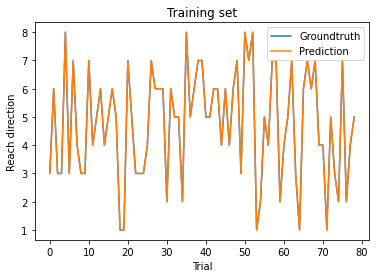

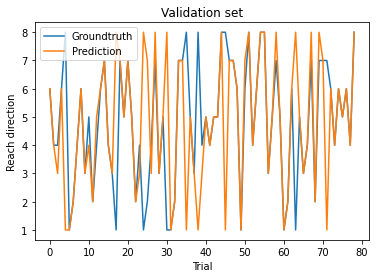

In [7]:
import sklearn.linear_model as sk
model = sk.LogisticRegression(penalty='none')
# a)
model.fit(X_train,y_train)
perf_train = model.predict(X_train)
perf_val = model.predict(X_val)

# b)
print("Training performance is ", np.mean(perf_train == y_train))
print("Validation performance is ", np.mean(perf_val == y_val))

# c)
plt.figure()
plt.plot(perf_train)
plt.plot(y_train)
plt.xlabel("Trial")
plt.ylabel("Reach direction")
plt.legend(["Groundtruth","Prediction"])
plt.title("Training set")
plt.show()

plt.figure()
plt.plot(perf_val)
plt.plot(y_val)
plt.xlabel("Trial")
plt.ylabel("Reach direction")
plt.legend(["Groundtruth","Prediction"])
plt.title("Validation set")
plt.show()



In [ ]:
#FIND SOME HELP HERE

import sklearn.linear_model as sk

model = sk.LogisticRegression(penalty='none')
model.fit(X,y)
model.predict(X)

**Interpretation:** Is the logistic regression model overfitting on the training set? If yes, can you think of ways that overfitting could be avoided so as to improve the performance of the model on the validation set?

#ANSWER HERE

**BONUS Question (no points): Try regularizing the logistic regressor against overfitting using an 'L1' penalty** 

a) Add an L1 penalty to the coefficients of the regression. Vary the tradeoff hyperparameter `C` in the range [1000, 100, 10, 1.0, 0.1, 0.01, 0.001, 0.0001], and plot the performance of the prediction on the training and validation sets as a function of `C`. Add an x-label, y-label, legend, and title to your figure.

b) Plot the coefficents of the regression for each value of `C` on one figure, one curve for each value of `C`, plotted with different y-offsets so that they don't overlap. Add an x-label, y-label, legend, and title to your figure.

**Tip**: use the function `sklearn.linear_model.LogisticRegression`, with the solver 'liblinear' and the penalty 'l1'. Note that 'C' is the inverse of regularization strength: the smaller 'C' is, the stronger the 'l1' regularization is (source: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

In [ ]:
#CODE YOUR SOLUTION HERE

In [ ]:
#FIND SOME HELP HERE

import sklearn.linear_model as sk

model = sk.LogisticRegression(penalty='l1',C=1000,max_iter=200,solver = 'liblinear')
model.fit(X,y)
model.predict(X)
model.coef_[0]

**Interpretation:** Do you find that an 'L1' penalty reduces the number of coefficents with non-zero values? Do you find that an 'L1' penalty avoids the overfitting problem? Does it result in an improved prediction on the validation set compared to the non-regularized regression? If not, can you think of an explanation why this regularization might not be beneficial?

#ANSWER HERE

## 3.2. Temporal decoding analysis

We will now perform a temporal decoding analysis, in order to study at what point in time the reach direction becomes decodable for each brain region `PMd` and `MI`.


**Question 3: Analyzing how decoding performance varies as a function of time, for each brain region.**

3.1: Randomly permute the trials of the `firingRate` and `direction` arrays.

3.2: For each brain region `PMd` and `MI`, and for each time bin `dt` (ranging from 0 to 29):
 
   a) Generate a matrix containing the neural activity of all neurons for all trials for this brain region and this time bin. The size of this matrix should be `numTrials x numNeurons`.
   
   b) Z-score the data. Add a very small number (e.g., `1e-10`) to the standard deviation term in order to avoid dividing by zero (when the neuron is silent throughout trials).
   
   c) Train a decoder to predict reach direction from neural activity at time `dt`. Use a K-fold training/validation split with K=10.

   d) Store the prediction accuracies on the validation set in an array of size `numTimeBinsx10x2`, where 10 is the number of folds, and 2 in the number of brain regions (`PMd` and `MI`). 

3.3: For each brain region plot the validation accuracy (averaged over the 10 folds) of the decoder as a function of the time bin `dt`. Plot an error shade corresponding to the 95% confidence interval of the mean for each curve, computed over the 10 validation folds. Add an x-label (time is seconds), y-label, title and legend to your figure.

**Tip**: use the function `sklearn.linear_model.LogisticRegression`, with the solver 'lbfgs' and no penalty.

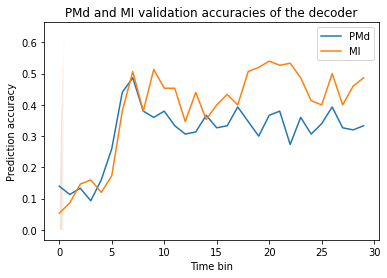

In [9]:
from re import S
import numpy as np
import sklearn.linear_model as sk
model = sk.LogisticRegression(penalty = "none")

# 3.1
permutation = np.random.permutation(numTrials)
fr_permute = firingRate[:,:,permutation]
dir_permute = direction[permutation]

dt_perf_train = np.zeros((30,10,2))
dt_perf_val = np.zeros((30,10,2))

# 3.2
# a)
for bregion in range(2):
  if bregion == 0:
    fire_region = fr_permute[brainRegion == 'PMd',:,:]
  else:
    fire_region = fr_permute[brainRegion == 'MI',:,:]

  for dt in range(30):
    neural_act = fire_region[:,dt,:]
  
    # b)
    my = np.mean(neural_act, axis = 0)
    sigma = np.std(neural_act, axis = 0)+1e-10
    z_neural_act = (neural_act - my) / sigma
  
    # c)
    for kfold in range(10):
      fold = np.zeros(158)
      fold[kfold*int(158/10):int(158/10)+kfold*int(158/10)] = 1
      X_train = z_neural_act[:, fold == 0].T
      X_val = z_neural_act[:, fold == 1].T
      y_train = dir_permute[fold == 0]
      y_val = dir_permute[fold == 1]

      model.fit(X_train,y_train)
      perf_train = model.predict(X_train)
      perf_val = model.predict(X_val)

      # d)
      dt_perf_train[dt, kfold, bregion] = np.mean(perf_train == y_train)
      dt_perf_val[dt, kfold, bregion] = np.mean(perf_val == y_val)

# 3.3
fig, ax = plt.subplots()
for bregion in range(2):
  Conf_intr = 2 * np.std(dt_perf_val[:, :, bregion],axis = 1)/np.sqrt(dt_perf_val.shape[1])
  mean = np.mean(dt_perf_val[:, :, bregion],axis = 1)
  ax.plot(mean) 
  ax.fill_between((mean-Conf_intr), (mean+Conf_intr), alpha = 0.1)

plt.xlabel("Time bin")
plt.ylabel("Prediction accuracy")
plt.legend(["PMd","MI"])
plt.title("PMd and MI validation accuracies of the decoder")
plt.show()









**Interpretation:** At what point in time does it become possible to predict the reach direction from each of these brain regions? Do different brain regions exhibit statistically significant differences in predictive power at different periods of the trial? If yes, how do you interpret these differences?

#ANSWER HERE

**BONUS Question (no points): Test whether brain regions have different predictive power over reach directions at early and late periods of the trial.**

One risk when interpreting the statistical significance of the differences seen in the plots of question 3 is that it is a case of multiple comparisons: for each of the time bin we might observe a potential difference between the two brain regions. One should be careful when finding statistical differences through many comparisons, because these differences might just occur by chance. There exists some statistical tests that take into account the number of comparisons performed. But here we will use a simpler approach to assess the significance of the difference between brain regions.

a) Train a decoder for each brain region, with neural activity averaged over the periods dt=10:15 (early period) and dt=20:25 (late period), using a K-fold validation strategy with K = 10.

b) Plot the validation set perfomance for early and late stages and for each region as a barplot. Add error bars indicating the 95% confidence interval of the mean for each condition. Add an x-label, y-label, legend and title to your figure.

In [ ]:
#CODE YOUR SOLUTION HERE


**Interpretation:** Do you find a statistical difference in decoding performance in the early stage between `PMd`and `MI`? And in the late stage? How do you interpret these findings?

#ANSWER HERE